# 此程式為簡易的探索式資料分析以及模型選用流程 (Here are a simple procedure for EDA and some models)

# Contents:

## 1. 資料讀取與處理 (Reading and processing data)

## 2. 探索式資料分析 (Explotary Data Analysis)

## 3. 模型 (Models)

## 0. 後續使用到之套件 (Packages Used in the Program)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import statsmodels.api as sm
from scipy import stats
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 1. 資料讀取與處理 (Reading and processing data)

### (1) 資料讀取 (Reading data)

#### i. 直接讀取與反應變數填寫(Directly Read  and Response Variable Verified)

In [ ]:
def read_csv_data(data_name):

  data_dir = "/content/drive/MyDrive/" + data_name

  data = pd.read_csv(data_dir, encoding= 'unicode_escape', sep = ",")

  return data

data_name = ".csv"
data = read_csv_data(data_name)
y = ""
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

#### ii. 特殊讀取與反應變數填寫（分號狀況）(Read by ";" and Response Variable Verified)

In [ ]:
def read_csv_special_data(data_name):

  data_dir = "/content/drive/MyDrive/" + data_name

  data = pd.read_csv(data_dir, encoding= 'unicode_escape', sep = ";")

  return data

data_name = ".csv"
data = read_csv_special_data(data_name)
y = ""
data.head()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#### iii. txt檔直接讀取與反應變數填寫(Directly Read and Response Variable Verified for txt File)

In [ ]:
def read_txt_data(data_name):

  data_dir = "/content/drive/MyDrive/" + data_name

  data = pd.read_fwf(data_dir)

  return data

data_name = ".txt"
data = read_csv_special_data(data_name)
y = ""
data.head()

#### iv. xlsx檔直接讀取與反應變數填寫(Directly Read  and Response Variable Verified for xlsx File)

In [ ]:
def read_xlsx_data(data_name):

  data_dir = "/content/drive/MyDrive/" + data_name

  data = pd.read_excel(data_dir)

  return data

data_name = ".xlsx"
data = read_xlsx_data(data_name)
y = ""
data.head()

### (2) 資料內容總整及確認(Data summary and verify)

#### i. 總整資訊(Summary)

In [ ]:
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

#### ii. 確認缺失值狀況(Check if there is any NA value)

In [ ]:
def isna_test(data):
  # check for missing values in the DataFrame
  if data.isna().any().any():

    mask = data.isna().any(axis=1)

    # select the rows with missing values
    rows_with_na = data[mask]

    # view the rows with missing values
    print("Below are rows that contains NA value.\n")
    print(rows_with_na)

  else:
    print('There is no missing value in the DataFrame')

isna_test(data)

There is no missing value in the DataFrame


### (3) 資料清洗 (Data cleaning)（不一定是必要）

#### i. 直接刪除含缺失值之列 (Delete the rows with NA)

In [ ]:
def delete_na(data):
  mask = data.isna().any(axis=1)
  return data[-mask]

data_temp = delete_na(data)

#### ii. 使用平均值填補缺失值 (Fill in NA with Mean)

In [ ]:
data_temp = data.fillna(data.mean(), inplace=True)

<ipython-input-26-c30057fa19c7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_temp = data.fillna(data.mean(), inplace=True)


#### iii. 使用零填補缺失值 (Fill in NA with zero)

In [ ]:
data_temp = data.fillna(0, inplace=True)

#### iv. 針對特定不正常值進行更動 (Change unusual value)

In [ ]:
data[data["the column"] == "unusual value"] = "reasonable value"
n = 0
data.iloc[n] = list(data.iloc[n])[1:] + [np.nan]

## 2. 探索式資料分析 (Explotary Data Analysis)

### (1) 類型辨識(Distinguishing type)

#### i. 自動辨識 (Passively Distinguish)

In [ ]:
def dist_type(data):

  # select only the variables that are metric type
  metric_vars = data.select_dtypes(include='number')
  cate_vars = data.select_dtypes(exclude='number')

  metric_vars = metric_vars.columns
  cate_vars = cate_vars.columns

  return list(metric_vars), list(cate_vars)

metric_variables, categorical_variables = dist_type(data)
print("Metric:", metric_variables)
print("Categorical:", categorical_variables)

Metric: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Categorical: ['Date', 'Seasons', 'Holiday', 'Functioning Day']


#### ii. 手動增減 (Actively Adjust)

In [ ]:
def adjust(metric_variables, categorical_variables, metric_to_cate, cate_to_metric, drop):
  for i in drop:
    if i in metric_variables:
      metric_variables.remove(i)
    elif i in categorical_variables:
      categorical_variables.remove(i)
  for i in metric_to_cate:
    metric_variables.remove(i)
  for i in cate_to_metric:
    categorical_variables.remove(i)
  for i in metric_to_cate:
     categorical_variables.append(i)
  for i in cate_to_metric:
     metric_variables.append(i)

  return metric_variables, categorical_variables

metric_variables, categorical_variables = adjust(metric_variables, categorical_variables,
                                                 metric_to_cate = [], cate_to_metric = [], drop =[])
print("Metric:", metric_variables)
print("Categorical:", categorical_variables)

Metric: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Categorical: ['Seasons', 'Holiday', 'Functioning Day', 'Hour']


### (2) 數字型變數探索(EDA for metric variables)

#### i. 變數分布之盒狀圖與直方圖(Box plot and histogram of distribution of a variable)

In [1]:
def distribution_of_metric(data, metric_variables, save = False):
  for m in metric_variables:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Create the boxplot on the second subplot
    ax1.boxplot(data[m])
    ax1.set_title("Box plot of " + m)
    ax1.set_ylabel("Values")

    # Create the histogram on the first subplot
    if max(data[m])-min(data[m]) > 1000:
      ax2.hist(data[m], bins=int((max(data[m])-min(data[m])+1)/30))
    else:
      ax2.hist(data[m], bins=int((max(data[m])-min(data[m])+1)))
    ax2.set_title("Histogram of " + m)
    ax2.set_xlabel(m)
    ax2.set_ylabel("Frequency")

    if save == True:
      plt.savefig("/content/drive/MyDrive/Box plot and histogram of " + m[0:5], format = "png")
    else:
      plt.show()

distribution_of_metric(data, metric_variables)

#### ii. 變數間相關係數熱力圖(Heatmap of coefficients of correlation between metric variables)

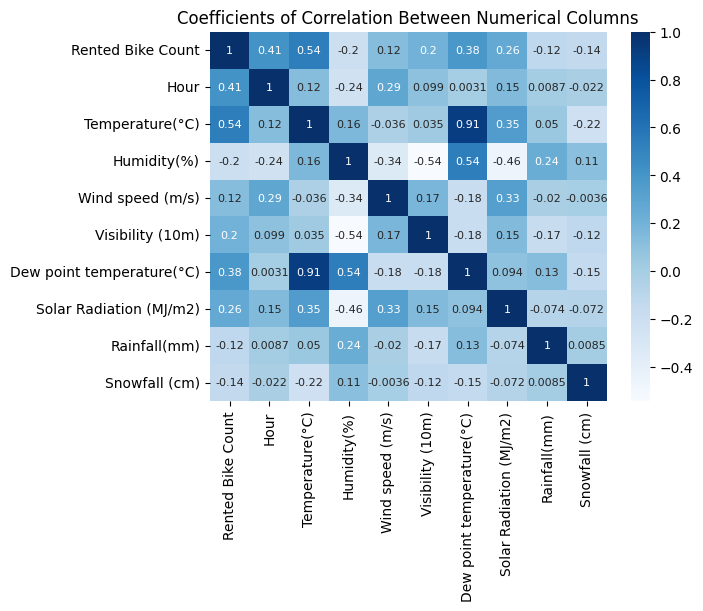

In [ ]:
def heatmap_cc(data, metric_variables):

  corr_matrix = data[metric_variables].corr()

  sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size": 8})

  plt.title("Coefficients of Correlation Between Numerical Columns")

  if save == True:
    plt.savefig("/content/drive/MyDrive/Box plot and histogram of " + m[0:5], format = "png")
  else:
    plt.show()

heatmap_cc(data, metric_variables)

#### iii. 變數依時間排序之折線圖(Line Plot of metric variables according to time)

FileNotFoundError: ignored

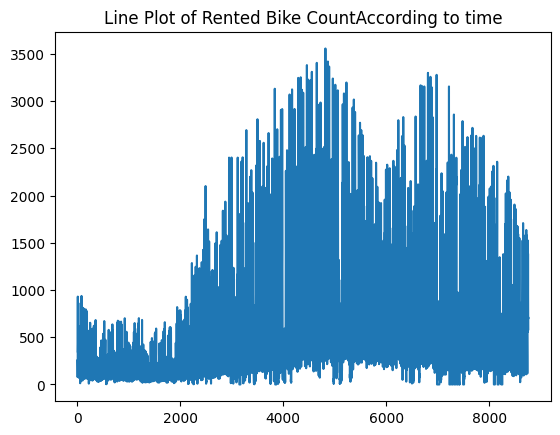

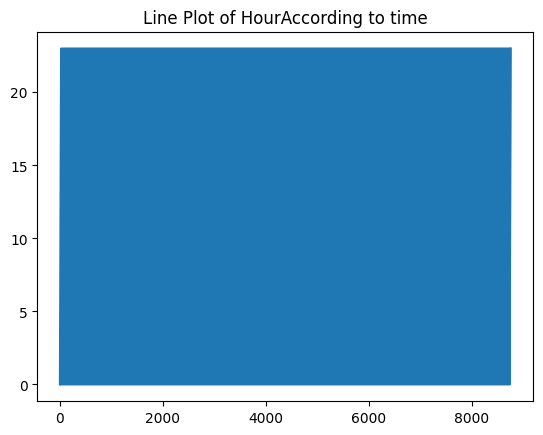

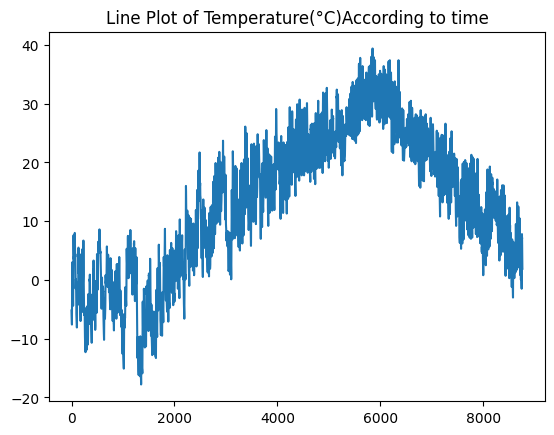

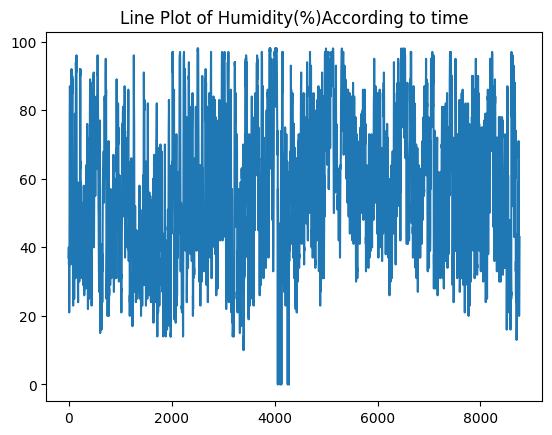

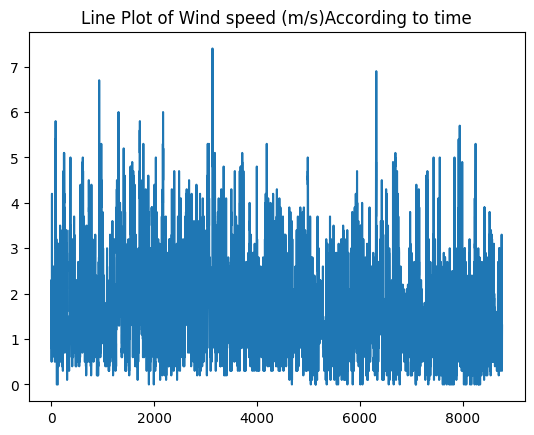

In [ ]:
def time_histogram(data, metric_variables):
  for m in metric_variables:
    plt.figure()
    plt.plot(data[m].index, data[m])
    plt.title("Line Plot of " + m + "According to time")

    plt.savefig("/content/drive/MyDrive/Line Plot of " + m + " According to time", format = "png")

time_histogram(data, metric_variables)

### (3) 非數字型變數探索(EDA for categorical variables)

#### i. 變數內各種類出現次數條狀圖 (Bar Chart of Count of each group in a variable)

In [ ]:
def count_of_each_group(data, categorical_variables):

  for c in categorical_variables:
    gr_data = data.groupby(c)
    count_gr_data = gr_data[c].count()

    plt.figure()

    plt.bar(count_gr_data.index, count_gr_data.values)

    plt.xlabel(c)
    plt.ylabel(y)
    name = 'Bar Chart of Count of ' + c
    plt.title(name)

    plt.savefig("/content/drive/MyDrive/" + name, format = "png")

count_of_each_group(data, categorical_variables)

#### ii. 變數內各種類對於反應變數之種類出現次數對應條狀圖及其卡方檢定 (Bar Chart of Frequency of Response Variable Grouped by Categorical Variables and the Chi-square Tests)

<Figure size 640x480 with 0 Axes>

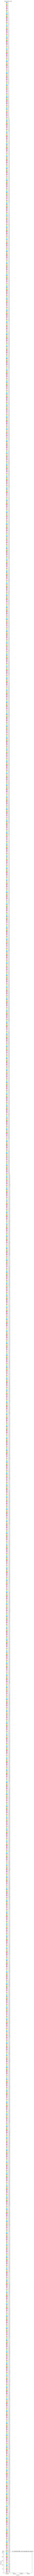

Rented Bike Count   0     2     3     4     5     6     7     8     9     \
Seasons                                                                    
Autumn             247.0   1.0   NaN   1.0   2.0   1.0   NaN   1.0   NaN   
Spring              48.0   2.0   NaN   1.0   1.0   2.0   2.0   4.0   6.0   
Summer               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   
Winter               NaN   NaN   2.0   3.0   NaN   NaN   2.0   2.0   3.0   

Rented Bike Count  10    ...  3256  3277  3298  3309  3365  3380  3384  3404  \
Seasons                  ...                                                   
Autumn              NaN  ...   1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   
Spring              4.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Summer              2.0  ...   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   
Winter              1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Rented Bike Count  3418  3556  
Seasons                       

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


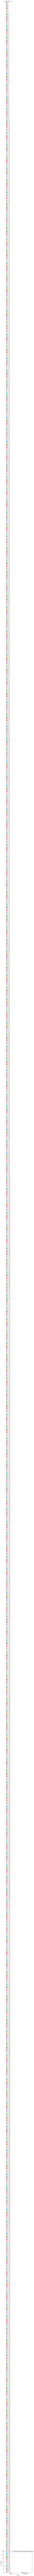

Rented Bike Count   0     2     3     4     5     6     7     8     9     \
Holiday                                                                    
Holiday             24.0   NaN   2.0   3.0   NaN   NaN   1.0   NaN   1.0   
No Holiday         271.0   3.0   NaN   2.0   3.0   3.0   3.0   7.0  11.0   

Rented Bike Count  10    ...  3256  3277  3298  3309  3365  3380  3384  3404  \
Holiday                  ...                                                   
Holiday             NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
No Holiday          7.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

Rented Bike Count  3418  3556  
Holiday                        
Holiday             NaN   NaN  
No Holiday          1.0   1.0  

[2 rows x 2166 columns]
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 2165
Expected frequencies:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


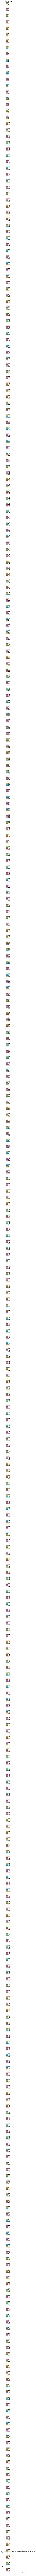

Rented Bike Count   0     2     3     4     5     6     7     8     9     \
Functioning Day                                                            
No                 295.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Yes                  NaN   3.0   2.0   5.0   3.0   3.0   4.0   7.0  12.0   

Rented Bike Count  10    ...  3256  3277  3298  3309  3365  3380  3384  3404  \
Functioning Day          ...                                                   
No                  NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Yes                 7.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

Rented Bike Count  3418  3556  
Functioning Day                
No                  NaN   NaN  
Yes                 1.0   1.0  

[2 rows x 2166 columns]
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 2165
Expected frequencies:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


<Figure size 640x480 with 0 Axes>

In [ ]:
def freq_by_group(data, categorical_variables, y):

  from scipy.stats import chi2_contingency

  for c in categorical_variables:
    # compute the frequency of each binary outcome for each group
    freq = data.groupby(c)[y].value_counts().unstack()

    plt.figure()

    # plot the results as a bar chart
    ax = freq.plot(kind='bar', rot=0)
    ax.set_xlabel(c)
    ax.set_ylabel('Frequency')
    ax.legend(title=y, labels=set(data[y]))
    name = "Bar Chart of Frequency of " + y + " grouped by " + c
    ax.set_title(name)
    plt.show();
    plt.savefig("/content/drive/MyDrive/" + name);

    print(freq)
    # perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(freq)

    # print the results
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

freq_by_group(data, categorical_variables[1:], y)

#### iii. 變數內各種類於反應變數之平均與總計條狀圖 (Bar Chart of Mean and Sum of Each Group in Variables)

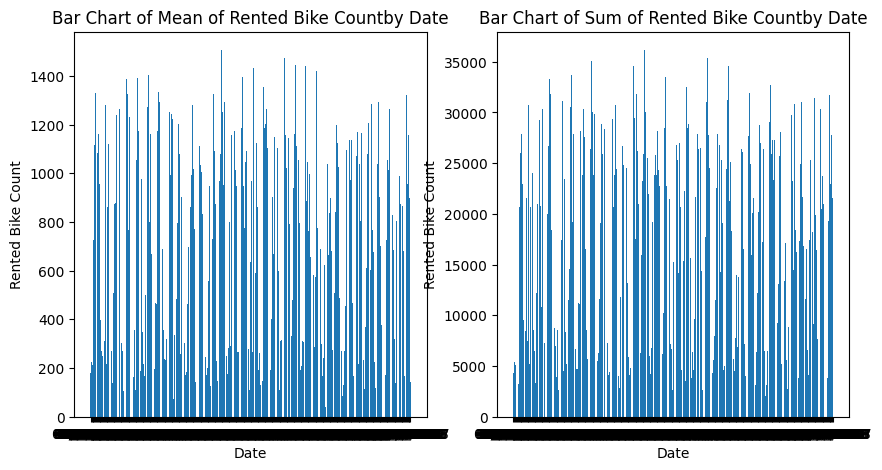

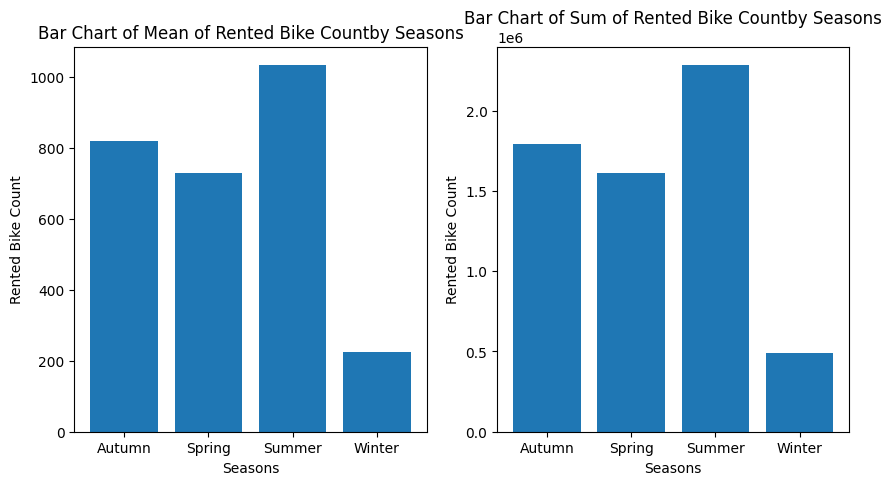

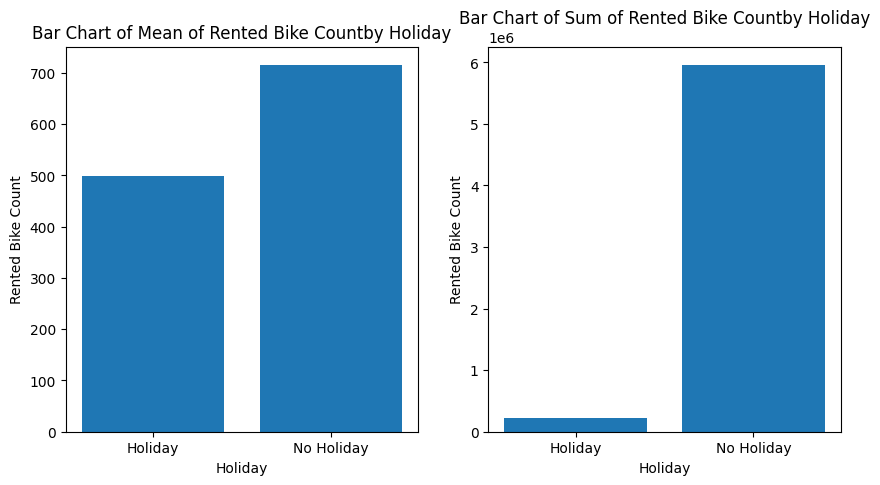

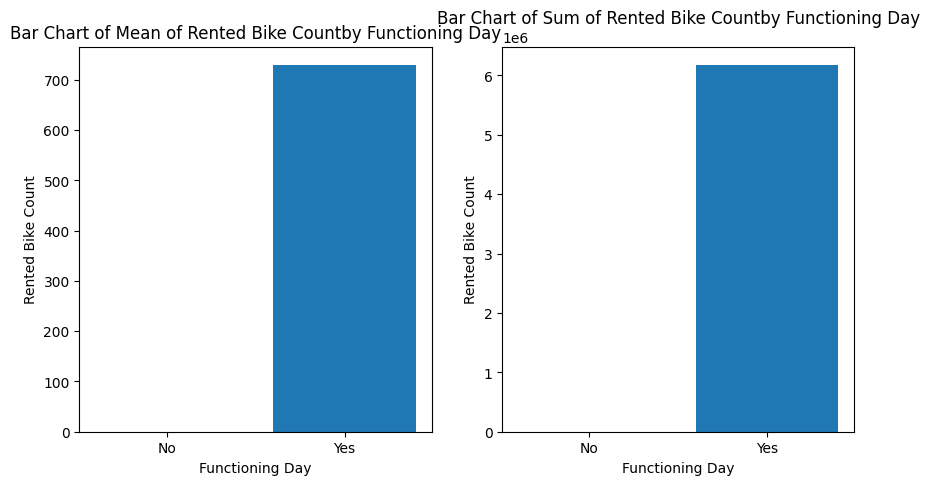

In [ ]:
def mean_and_total_of_each_group(data, categorical_variables, y):

  for c in categorical_variables:
    gr_data = data.groupby(c)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    mean_gr_data = gr_data[y].mean()
    ax1.bar(mean_gr_data.index, mean_gr_data.values)
    ax1.set_xlabel(c)
    ax1.set_ylabel(y)
    ax1.set_title('Bar Chart of Mean of ' + y + ' by ' + c)

    sum_gr_data = gr_data[y].sum()
    ax2.bar(sum_gr_data.index, sum_gr_data.values)
    ax2.set_xlabel(c)
    ax2.set_ylabel(y)
    ax2.set_title('Bar Chart of Sum of ' + y + ' by ' + c)

    plt.savefig("/content/drive/MyDrive/" + 'Bar Chart of Mean and Sum of ' + y + 'by ' + c, format = "png")

mean_and_total_of_each_group(data, categorical_variables, y)

## 3. 模型 (Models)

### (0) 類別型變數轉換為虛擬變數 (Changing Categorical Variables into Dummy Variables)

In [ ]:
def dummyChange(data, y, drop):
  data_processed = data.drop(drop, axis = 1)
  data_processed = data_processed.drop(y, axis = 1)
  if y in categorical_variables:
    categorical_variables.remove(y)
  for i in drop:
    if i in categorical_variables:
      categorical_variables.remove(i)
  dummy_x = pd.get_dummies(data_processed, columns = categorical_variables, drop_first = True)
  return dummy_x

data_changed = dummyChange(data, y, drop = [])
print(data_changed.head())

   Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons_Spring  ...  Hour_14  Hour_15  \
0           0.0            0.0             

### (1) 數值型預測 (Regression Model)

#### i. 數值型模型所需套件 (Packages for Regression Model)

In [ ]:
import time
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, PoissonRegressor
from statsmodels.tools.tools import pinv_extended
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

#### ii. 迴歸 (Regression)

##### (i) 線性迴歸 (Linear Regression)

In [ ]:
def lm(data, y):

  X_lin = sm.add_constant(data.drop(y, axis = 1))
  model = sm.OLS(data[y], X_lin).fit()
  print("Linear regression summary:\n", model.summary(), "\n")

  model = LinearRegression()
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("Linear Regression RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("Linear Regrssion R Squared:", np.mean(scores["test_r2"]))

lm(data_changed, y)

Linear regression summary:
                             OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     474.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:51:49   Log-Likelihood:                -64349.
No. Observations:                8760   AIC:                         1.288e+05
Df Residuals:                    8723   BIC:                         1.290e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

##### (ii) Lasso迴歸 (Lasso Regression)

Lasso summary:
                             OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     463.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:04:45   Log-Likelihood:                -64418.
No. Observations:                8760   AIC:                         1.289e+05
Df Residuals:                    8723   BIC:                         1.292e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const 

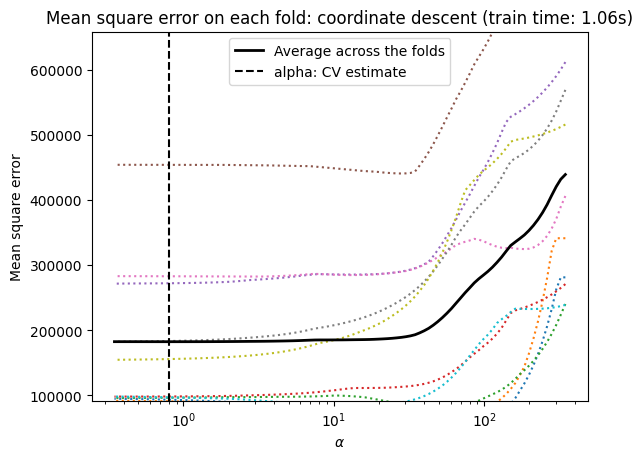

In [ ]:
def LassoReg(data, y):
  start_time = time.time()
  model = make_pipeline(StandardScaler(), LassoCV(cv=10)).fit(data.drop(y, axis = 1), data[y])
  fit_time = time.time() - start_time

  lasso = model[-1]
  ymin, ymax = lasso.mse_path_.mean(axis=-1).min() * 0.5, lasso.mse_path_.mean(axis=-1).max() * 1.5
  plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
  plt.plot(
      lasso.alphas_,
      lasso.mse_path_.mean(axis=-1),
      color="black",
      label="Average across the folds",
      linewidth=2,
  )
  plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

  plt.ylim(ymin, ymax)
  plt.xlabel(r"$\alpha$")
  plt.ylabel("Mean square error")
  plt.legend()
  _ = plt.title(
      f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
  )

  X_lin = sm.add_constant(data.drop(y, axis = 1))
  model = sm.OLS(data[y], X_lin)
  lasso_sm = model.fit_regularized(alpha = lasso.alpha_, L1_wt = 1)
  pinv_wexog,_ = pinv_extended(X_lin)
  normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
  final = sm.regression.linear_model.OLSResults(model,
                                              lasso_sm.params,
                                              normalized_cov_params)
  print("Lasso summary:\n", final.summary(), "\n")

  model = Lasso(lasso.alpha_)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("Lasso RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("Lasso R Squared:", np.mean(scores["test_r2"]))

LassoReg(data_changed, y)

##### (iii) Ridge迴歸 (Ridge Regression)

In [ ]:
def RidgeReg(data, y):
  start_time = time.time()
  model = make_pipeline(StandardScaler(), RidgeCV(cv=10)).fit(data.drop(y, axis = 1), data[y])
  fit_time = time.time() - start_time

  ridge = model[-1]
  # ymin, ymax = ridge.mse_path_.mean(axis=-1).min() * 0.5, ridge.mse_path_.mean(axis=-1).max() * 1.5
  # plt.semilogx(ridge.alphas_, ridge.mse_path_, linestyle=":")
  # plt.plot(
  #     ridge.alphas_,
  #     ridge.mse_path_.mean(axis=-1),
  #     color="black",
  #     label="Average across the folds",
  #     linewidth=2,
  # )
  # plt.axvline(ridge.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

  # plt.ylim(ymin, ymax)
  # plt.xlabel(r"$\alpha$")
  # plt.ylabel("Mean square error")
  # plt.legend()
  # _ = plt.title(
  #     f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
  # )
  print("Ridge Alpha:", ridge.alpha_)
  X_lin = sm.add_constant(data.drop(y, axis = 1))
  model = sm.OLS(data[y], X_lin)
  ridge_sm = model.fit_regularized(alpha = ridge.alpha_, L1_wt = 0)

  pinv_wexog,_ = pinv_extended(X_lin)
  normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
  final = sm.regression.linear_model.OLSResults(model,
                                              ridge_sm.params,
                                              normalized_cov_params)
  print("Ridge summary:\n", final.summary(), "\n")

  model = Ridge(ridge.alpha_)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("Ridge RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("Ridge R Squared:", np.mean(scores["test_r2"]))

RidgeReg(data_changed, y)

Ridge Alpha: 10.0
Ridge summary:
                             OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:13:49   Log-Likelihood:                -67204.
No. Observations:                8760   AIC:                         1.345e+05
Df Residuals:                    8723   BIC:                         1.347e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

##### (iv) 卜瓦松迴歸 (Poisson Regression / Generalized Linear Model with Poisson Distribution)

In [ ]:
def glmPoi(data, y):
  glm_possion_model = sm.GLM(data[y], data.drop(y, axis=1),
                      family=sm.families.Poisson())
  model = glm_possion_model.fit()
  print(model.summary())
  model = PoissonRegressor(alpha = 0, max_iter = 10000)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("GLM with Poisson RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("GLM with Poisson R Squared:", np.mean(scores["test_r2"]))

glmPoi(data_changed, y)

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Rented Bike Count   No. Observations:                 8760
Model:                            GLM   Df Residuals:                     8724
Model Family:                 Poisson   Df Model:                           35
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.3064e+05
Date:                Tue, 27 Jun 2023   Deviance:                   9.9418e+05
Time:                        05:14:13   Pearson chi2:                 8.01e+09
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temperature(°C)       

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l

GLM with Poisson RMSE: 644.8180194804243
GLM with Poisson R Squared: -0.0010008085146598455


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


#### iii. 時間序列模型 (Time Series)

ADF Statistic: -22.061339
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Axes: >

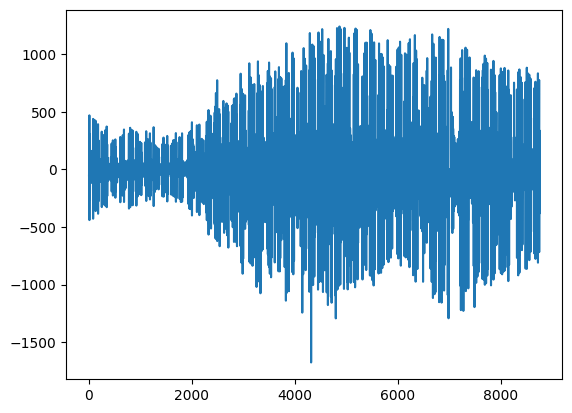

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data[y].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
data[y].diff().dropna().plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


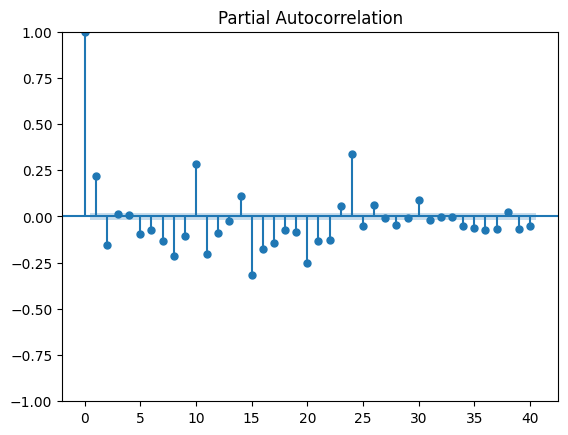

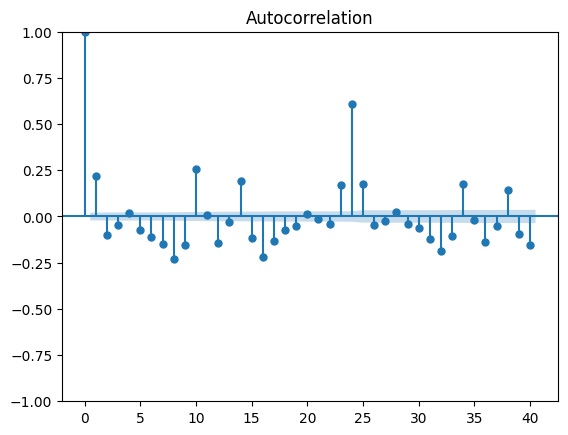

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(data[y].diff().dropna());
plot_acf(data[y].diff().dropna());

##### (i) 整合移動平均自迴歸模型 (Autoregressive Integrated Moving Average, ARIMA)

In [ ]:
def arima(data, y):
  # Create the ARMAX model
  model = sm.tsa.arima.ARIMA(data[y], order=(4, 1, 3))

  # Fit the model to the training data
  results = model.fit()

  # make predictions on the training data
  y_pred = results.predict(start = 0)

  # calculate the MSE of the predictions
  mse = mean_squared_error(data[y], y_pred)
  r2 = r2_score(data[y], y_pred)

  # Print the model summary
  print(results.summary(), "\n")
  # print the MSE values
  print("ARIMA RMSE:", np.sqrt(mse))
  print("ARIMA R-squared:", r2)

arima(data_changed, y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


NameError: ignored

##### (ii) 整合移動平均自迴歸模型結合外生變數 (Autoregressive Moving Average eXogenous, ARMAX)

In [ ]:
def arima(data, y):
  # Create the ARMAX model
  model = sm.tsa.arima.ARIMA(data[y], order=(4, 1, 3), exog = data.drop(y, axis = 1))

  # Fit the model to the training data
  results = model.fit()

  # make predictions on the training data
  y_pred = results.predict(start = 0, exog = data.drop(y, axis = 1))

  # calculate the MSE of the predictions
  mse = mean_squared_error(data[y], y_pred)
  r2 = r2_score(data[y], y_pred)

  # Print the model summary
  print(results.summary())
  # print the MSE values
  print("ARIMA RMSE:", np.sqrt(mse))
  print("ARIMA R-squared:", r2)

arima(data_changed, y)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Rented Bike Count   No. Observations:                 8760
Model:                 ARIMA(4, 1, 3)   Log Likelihood              -60789.495
Date:                Sun, 16 Apr 2023   AIC                         121628.989
Time:                        17:19:41   BIC                         121805.935
Sample:                             0   HQIC                        121689.281
                               - 8760                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Hour                          3.9984      1.088      3.674      0.000       1.865       6.131
Temperature(°C)              60.7144      4.021     15.098      0.000      52.833     

##### (iii) 結合自迴歸之迴歸模型 (Regression Model with Autoregression)

In [ ]:
def RegwithLag(data, y, lrtype, step):
  for i in range(1, step+1):
    data[y + str(i)] = data[y].shift(i)
  data = data[i:]
  if lrtype == "lr":
    lm(data, y)
  elif lrtype == "lasso":
    LassoReg(data, y)
  elif lrtype == "ridge":
    RidgeReg(data, y)
  elif lrtype == "poi":
    glmPoi(data, y)

RegwithLag(data_changed, y, lrtype = "ridge", step = 3)

Ridge Alpha: 0.1
Ridge summary:
                             OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1610.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:26:47   Log-Likelihood:                -59861.
No. Observations:                8757   AIC:                         1.198e+05
Df Residuals:                    8717   BIC:                         1.201e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### iv. 迴歸樹 (Regression Tree)

In [ ]:
def RegressionTree(data, y):
  model = DecisionTreeRegressor(max_depth = 3, random_state=19972003)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  result = model.fit(data.drop(y, axis=1), data[y])
  plot_tree(result)

  print("Regression Tree RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("Regression Tree R Squared:", np.mean(scores["test_r2"]))

RegressionTree(data_changed, y)

Regression Tree RMSE: 319.6619185354959
Regression Tree R Squared: 0.7532449619785818


#### v. 迴歸支持向量機 (Support Vector Machine for Regression, SVR)

In [ ]:
def SvmReg(data, y):
  model = SVR(kernal = 'linear', C=1.0, epsilon=0.1)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("SVR RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("SVR R Squared:", np.mean(scores["test_r2"]))

SvmReg(data_changed, y)

Ridge RMSE: 658.7709057629054
Ridge R Squared: -0.04477577385936291


#### vi. 整合型模型 (Ensemble Models)

##### (i) 迴歸用隨機森林 (Random Forest for Regression)

In [ ]:
def RFR(data, y):
  model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
                       return_train_score=True)
  print("Random Forest RMSE:", -1 * np.mean(scores["test_neg_root_mean_squared_error"]))
  print("Random Forest R Squared:", np.mean(scores["test_r2"]))

RFR(data_changed, y)

Random Forest RMSE: 287.1847253686885
Random Forest R Squared: 0.8009812892685952


##### (ii) 迴歸用輕量化梯度提昇機 (Light Gradient Boosting Machine for Regression, LightGBM for Regression)

In [ ]:
def LGBMR(data, y):
  x = data.drop(y, axis = 1)
  params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
  }

  train_data = lgb.Dataset(x, label=data[y])

  model = lgb.cv(params, train_data, nfold = 10, seed = 19972003, metrics = "rmse")
  # kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  # scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("neg_root_mean_squared_error", "r2"),
  #                      return_train_score=True)
  print("LightGBM RMSE:", np.mean(model["rmse-mean"]))
  # print("LightGBM R Squared:", np.mean(model["r2"]))

LGBMR(data_changed, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7884, number of used features: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7884, number of used features: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7884, number of u

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7884, number of used features: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 7884, number of used features: 36
[LightGBM] [Info] Start training from score 704.667047
[LightGBM] [Info] Start training from score 703.958777
[LightGBM] [Info] Start training from score 704.452182
[LightGBM] [Info] Start training from score 704.334475
[LightGBM] [Info] Start training from score 704.046550
[LightGBM] [Info] Start training from score 703.470193
[LightGBM] [Info] Start 

#### vii. 迴歸用深度神經網路 (Deep Neural Network for Regression, DNN for Regression)

In [ ]:
def DNNR(data, y):
  x = data.drop(y, axis = 1)

  X_train, X_test, y_train, y_test = train_test_split(x, data[y], test_size=0.1, random_state=19972003)
  reg_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
  ])

  reg_model.compile(loss='mse', optimizer='adam')
  reg_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

  y_pred = reg_model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # print the MSE values
  print("DNN RMSE:", np.sqrt(mse))
  print("DNN R-squared:", r2)

DNNR(data_changed, y)

Epoch 1/100
71/71 [==============================] - 2s 9ms/step - loss: 447619.3750 - val_loss: 422296.2500
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 406284.3438 - val_loss: 401391.5000
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 385291.3125 - val_loss: 376232.2500
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 362145.9688 - val_loss: 350406.3438
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 334980.3438 - val_loss: 318129.3125
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 305477.2188 - val_loss: 297359.8125
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 293039.5000 - val_loss: 281000.2188
Epoch 8/100
71/71 [==============================] - 0s 5ms/step - loss: 281993.2812 - val_loss: 276908.4688
Epoch 9/100
71/71 [==============================] - 0s 5ms/step - loss: 277723.2188 - val_loss: 276786.8438
Epoch 10/100
71/71 

### (2) 分類型預測 (Classification Model)

#### i.分類型模型所需套件 (Packages for Classification Model)

In [ ]:
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.tools import pinv_extended
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#### ii. 羅吉斯迴歸 (Logistic Regression)

In [ ]:
def logistic(data, y):
  # Create a logistic regression model and fit it to the training data
  model = sm.Logit(data[y], data.drop(y, axis=1)).fit()
  print(model.summary())
  model = LogisticRegression()
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("accuracy", "precision", "recall", 'f1', 'roc_auc'),
                       return_train_score=True)

  # Evaluate the performance of the model
  print("Logistic Accuracy:", np.mean(scores["test_accuracy"]))
  print("Logistic Precision:", np.mean(scores["test_precision"]))
  print("Logistic Recall:", np.mean(scores["test_recall"]))
  print("Logistic F1 Score:", np.mean(scores["test_f1"]))
  print("Logistic AUC Score:",np.mean(scores["test_roc_auc"]))

logistic(data_changed, y)

NameError: ignored

#### iii. 決策樹 (Decision Tree)

In [ ]:
def DT(data, y):
  model = DecisionTreeClassifier(max_depth = 3)
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("accuracy", "precision", "recall", 'f1', 'roc_auc'),
                       return_train_score=True)
  result = model.fit(data.drop(y, axis=1), data[y])
  plot_tree(result)

  # Evaluate the performance of the model
  print("Decision Tree Accuracy:", np.mean(scores["test_accuracy"]))
  print("Decision Tree Precision:", np.mean(scores["test_precision"]))
  print("Decision Tree Recall:", np.mean(scores["test_recall"]))
  print("Decision Tree F1 Score:", np.mean(scores["test_f1"]))
  print("Decision Tree AUC Score:",np.mean(scores["test_roc_auc"]))

DT(data_changed, y)

Decision Tree Accuracy: 0.8907501820830298
Decision Tree Precision: 0.941525306854227
Decision Tree Recall: 0.9348213063124743
Decision Tree F1 Score: 0.9381613302184967


#### iv. 分類用支持向量機 (Support Vector Machine for Classification, SVC)

In [ ]:
def SVRCLA(data, y):
  model = SVC(kernel='linear')
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("accuracy", "precision", "recall", 'f1', 'roc_auc'),
                       return_train_score=True)

  # Evaluate the performance of the model
  print("SVC Accuracy:", np.mean(scores["test_accuracy"]))
  print("SVC Precision:", np.mean(scores["test_precision"]))
  print("SVC Recall:", np.mean(scores["test_recall"]))
  print("SVC F1 Score:", np.mean(scores["test_f1"]))
  print("SVC AUC Score:",np.mean(scores["test_roc_auc"]))

SVRCLA(data_changed, y)

#### v. 整合型模型 (Ensemble Models)

##### (i) 分類用隨機森林 (Random Forest for Classification)

In [ ]:
def RFC(data, y):
  model = RandomForestClassifier()
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("accuracy", "precision", "recall", 'f1', 'roc_auc'),
                       return_train_score=True)

  # Evaluate the performance of the model
  print("Random Forest Accuracy:", np.mean(scores["test_accuracy"]))
  print("Random Forest Precision:", np.mean(scores["test_precision"]))
  print("Random Forest Recall:", np.mean(scores["test_recall"]))
  print("Random Forest F1 Score:", np.mean(scores["test_f1"]))
  print("Random Forest AUC Score:",np.mean(scores["test_roc_auc"]))

RFC(data_changed, y)

##### (ii) 分類用輕量化梯度提昇機 (Light Gradient Boosting Machine for Classification, LightGBM for Classification)

In [ ]:
def LGBC(data, y):
  model = lgb.LGBMClassifier()
  kfold = KFold(n_splits=10, shuffle=True, random_state=19972003)
  scores = cross_validate(model, data.drop(y, axis=1), data[y], cv = kfold, scoring=("accuracy", "precision", "recall", 'f1', 'roc_auc'),
                       return_train_score=True)

  # Evaluate the performance of the model
  print("LightGBM Accuracy:", np.mean(scores["test_accuracy"]))
  print("LightGBM Precision:", np.mean(scores["test_precision"]))
  print("LightGBM Recall:", np.mean(scores["test_recall"]))
  print("LightGBM F1 Score:", np.mean(scores["test_f1"]))
  print("LightGBM AUC Score:", np.mean(scores["test_roc_auc"]))

LGBC(data_changed, y)

#### vi. 分類用深度神經網路 (Deep Neural Network for Classfication, DNN for Classfication)

In [ ]:
def DNNC(data, y):
  x = np.asarray(data.drop(y, axis = 1)).astype(np.float32)
  y = np.asarray(data[y]).astype(np.float32)

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=19972003)
  clf_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  clf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  clf_model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

  y_pred_o = clf_model.predict(X_test)
  y_pred = []
  for i in y_pred_o:
    if i < 0.5:
      y_pred.append(0)
    else:
      y_pred.append(1)
  print("DNN Accuracy:", accuracy_score(y_test, y_pred))
  print("DNN Precision:", precision_score(y_test, y_pred, pos_label=1))
  print("DNN Recall:", recall_score(y_test, y_pred, pos_label=1))
  print("DNN F1 Score:", f1_score(y_test, y_pred, pos_label=1))

DNNC(data_changed, y)

NameError: ignored